In [1]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("../estudo_inicial/base_de_dados_formatada.csv")
df = df[df.delta_t>0]
df = df.drop(columns=['enxerto','ID','data_da_inscricao','data_do_obito','data_do_transplante','data_de_nascimento','data_do_evento'])
df.head()

,uf,regiao,tipo_do_doador,uf_de_origem,sexo,grupo_sanguineo,cor,idade,obito_bin,transplante_bin,delta_t
0,PB,Nordeste,Doador Falecido,PB,M,O,Parda,15467.0,0,1,758.0
1,PB,Nordeste,Doador Falecido,PB,M,A,Parda,18640.0,0,1,707.0
2,PE,Nordeste,Doador Falecido,PE,M,O,Parda,21310.0,0,1,864.0
3,PE,Nordeste,NaN,NaN,M,O,Branca,18651.0,0,1,1080.0
4,PE,Nordeste,Doador Falecido,PE,F,A,Parda,14804.0,0,1,115.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47069 entries, 0 to 47597
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   uf               47069 non-null  object 
 1   regiao           47069 non-null  object 
 2   tipo_do_doador   37902 non-null  object 
 3   uf_de_origem     37902 non-null  object 
 4   sexo             47069 non-null  object 
 5   grupo_sanguineo  47069 non-null  object 
 6   cor              47069 non-null  object 
 7   idade            47069 non-null  float64
 8   obito_bin        47069 non-null  int64  
 9   transplante_bin  47069 non-null  int64  
 10  delta_t          47069 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 4.3+ MB


In [6]:
np.unique(df.tipo_do_doador.dropna().values,return_counts=True)

(array(['Doador Falecido', 'Doador Vivo'], dtype=object),
 array([31499,  6403]))

In [8]:
df_bin = df.fillna(0)

bin_cols = [
    "uf",
    "regiao",
    "tipo_do_doador",
    "uf_de_origem",
    "sexo",
    "grupo_sanguineo",
    "cor",
]

for col in bin_cols:

    
    # converting to binary data
    df_one = pd.get_dummies(
        df[col],
    )

    # Use the .replace() method to map True/False to 1/0


    df_one[df_one==True] = 1
    df_one[df_one==False] = 0

    # Recolocando NaN
    df_one.loc[df[col].isnull()] = None

    # Renomeando colunas
    new_columns = [
        col + "_" + category.strip().replace(" ", "_") for category in df_one.columns
    ]

    df_one.columns = new_columns

    df_aux = pd.concat([df_bin, df_one],axis=1)

    df_aux = df_aux.drop(columns=[col])

    df_bin = df_aux

df_bin.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47069 entries, 0 to 47597
Data columns (total 73 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   idade                           47069 non-null  float64
 1   obito_bin                       47069 non-null  int64  
 2   transplante_bin                 47069 non-null  int64  
 3   delta_t                         47069 non-null  float64
 4   uf_AC                           47069 non-null  object 
 5   uf_AL                           47069 non-null  object 
 6   uf_AM                           47069 non-null  object 
 7   uf_BA                           47069 non-null  object 
 8   uf_CE                           47069 non-null  object 
 9   uf_DF                           47069 non-null  object 
 10  uf_ES                           47069 non-null  object 
 11  uf_GO                           47069 non-null  object 
 12  uf_MA                           47069

In [9]:
df_nan = df_bin[df_bin.isna().any(axis=1)]
df_treated = df_bin[df_bin.notna().all(axis=1)]

print("Numero de nan: {}".format(len(df_nan)))
print("Numero de completos: {}".format(len(df_treated)))

Numero de nan: 9167
Numero de completos: 37902


In [10]:
df_treated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37902 entries, 0 to 47596
Data columns (total 73 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   idade                           37902 non-null  float64
 1   obito_bin                       37902 non-null  int64  
 2   transplante_bin                 37902 non-null  int64  
 3   delta_t                         37902 non-null  float64
 4   uf_AC                           37902 non-null  object 
 5   uf_AL                           37902 non-null  object 
 6   uf_AM                           37902 non-null  object 
 7   uf_BA                           37902 non-null  object 
 8   uf_CE                           37902 non-null  object 
 9   uf_DF                           37902 non-null  object 
 10  uf_ES                           37902 non-null  object 
 11  uf_GO                           37902 non-null  object 
 12  uf_MA                           37902

<Axes: >

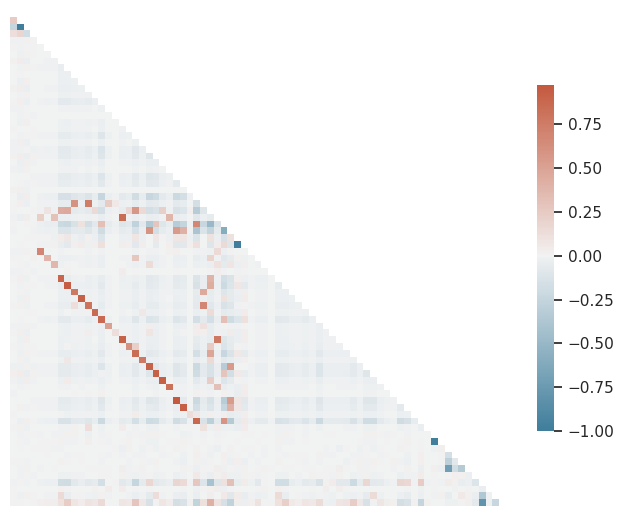

In [11]:
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")


# Compute the correlation matrix
corr = df_treated.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr.fillna(0),
    mask=mask,
    cmap=cmap,
    center=0,
    square=True,
    # linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    xticklabels=False, yticklabels=False
    
)

In [12]:
corr_abs = ((corr.fillna(0)) ** 2) ** 0.5
pd.DataFrame(
    {
        "Atributo": corr_abs.obito_bin.sort_values(ascending=False).index,
        "Correlação": corr_abs.obito_bin.sort_values(ascending=False).values,
    }
).head(12)

,Atributo,Correlação
0,obito_bin,1.000000
1,transplante_bin,1.000000
2,idade,0.241845
3,delta_t,0.177477
4,uf_de_origem_RJ,0.041654
5,uf_BA,0.033238
6,uf_RJ,0.030289
7,uf_GO,0.030238
8,regiao_Norte,0.029884
9,uf_SP,0.029783


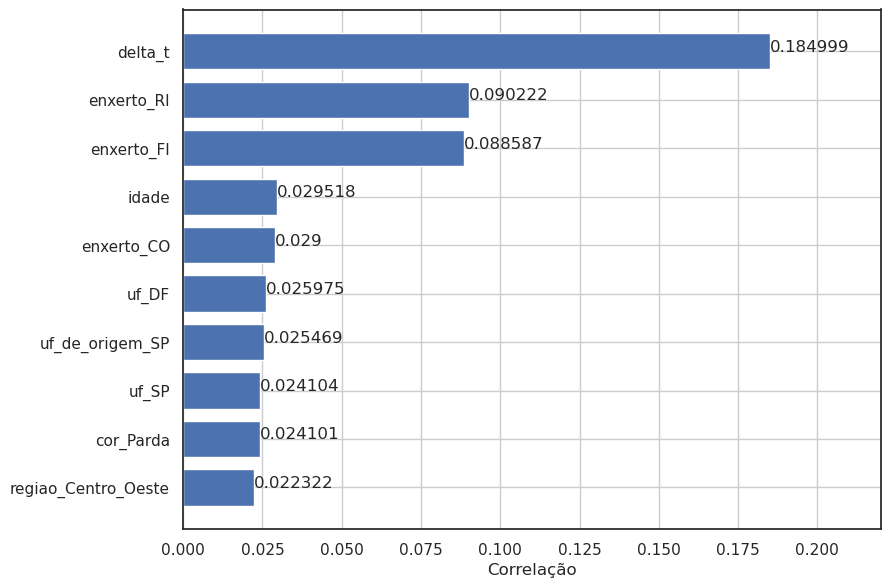

In [13]:
import matplotlib.pyplot as plt
import numpy as np

k = 0.75

fig = plt.figure(figsize=[k * 12, k * 9])

# Example data
people = (
    "delta_t",
    "enxerto_RI",
    "enxerto_FI",
    "idade",
    "enxerto_CO",
    "uf_DF",
    "uf_de_origem_SP",
    "uf_SP",
    "cor_Parda",
    "regiao_Centro_Oeste",
)
y_pos = np.arange(len(people))
performance = [
    0.184999,
    0.090222,
    0.088587,
    0.029518,
    0.029000,
    0.025975,
    0.025469,
    0.024104,
    0.024101,
    0.022322,
]

ax = fig.add_subplot(1, 1, 1)

width = 0.75

ax.barh(
    y_pos,
    performance,
    width,
    align="center",
)

for i, v in enumerate(performance):
    ax.text(v, i, str(v), fontsize=12)

ax.set_yticks(y_pos, labels=people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel("Correlação")
ax.set_xlim(0, 0.22)
ax.grid()

plt.show()

In [14]:
pd.DataFrame(
    {
        "Atributo": corr_abs.transplante_bin.sort_values(ascending=False).index,
        "Correlação": corr_abs.transplante_bin.sort_values(ascending=False).values,
    }
).head(12)

,Atributo,Correlação
0,transplante_bin,1.000000
1,obito_bin,1.000000
2,idade,0.241845
3,delta_t,0.177477
4,uf_de_origem_RJ,0.041654
5,uf_BA,0.033238
6,uf_RJ,0.030289
7,uf_GO,0.030238
8,regiao_Norte,0.029884
9,uf_SP,0.029783


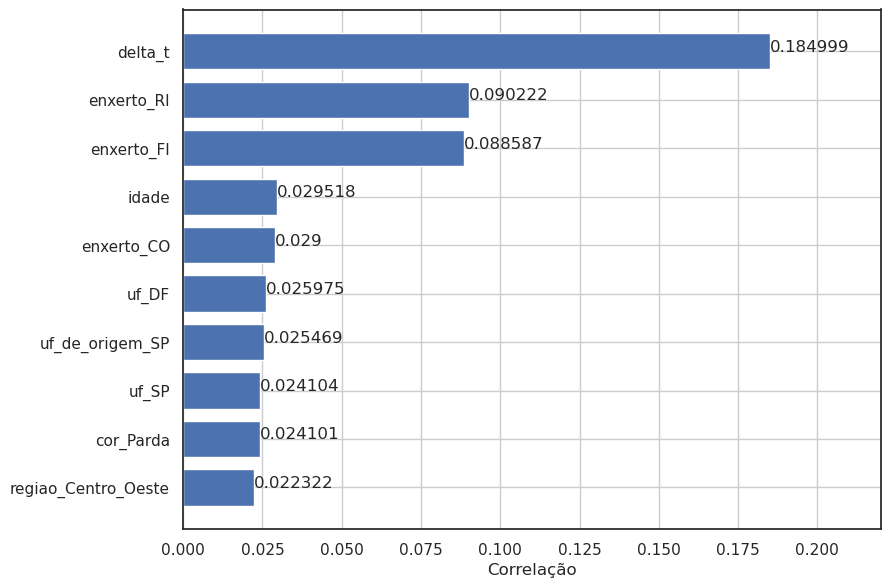

In [15]:
import matplotlib.pyplot as plt
import numpy as np

k = 0.75

fig = plt.figure(figsize=[k * 12, k * 9])


# Example data
people = (
    "delta_t",
    "enxerto_RI",
    "enxerto_FI",
    "idade",
    "enxerto_CO",
    "uf_DF",
    "uf_de_origem_SP",
    "uf_SP",
    "cor_Parda",
    "regiao_Centro_Oeste",
)
y_pos = np.arange(len(people))
performance = [
    0.184999,
    0.090222,
    0.088587,
    0.029518,
    0.029000,
    0.025975,
    0.025469,
    0.024104,
    0.024101,
    0.022322,
]

ax = fig.add_subplot(1, 1, 1)

width = 0.75

ax.barh(
    y_pos,
    performance,
    width,
    align="center",
)

for i, v in enumerate(performance):
    ax.text(v, i, str(v), fontsize=12)

ax.set_yticks(y_pos, labels=people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel("Correlação")
ax.set_xlim(0, 0.22)
ax.grid()

plt.show()

In [16]:
pd.DataFrame(
    {
        "Atributo": corr_abs.delta_t.sort_values(ascending=False).index,
        "Correlação": corr_abs.delta_t.sort_values(ascending=False).values,
    }
).head(13)

,Atributo,Correlação
0,delta_t,1.000000
1,transplante_bin,0.177477
2,obito_bin,0.177477
3,idade,0.122301
4,uf_PR,0.014564
5,uf_de_origem_PR,0.014021
6,uf_de_origem_RJ,0.013925
7,regiao_Sul,0.012148
8,uf_de_origem_AL,0.011539
9,cor_Amarela,0.011392


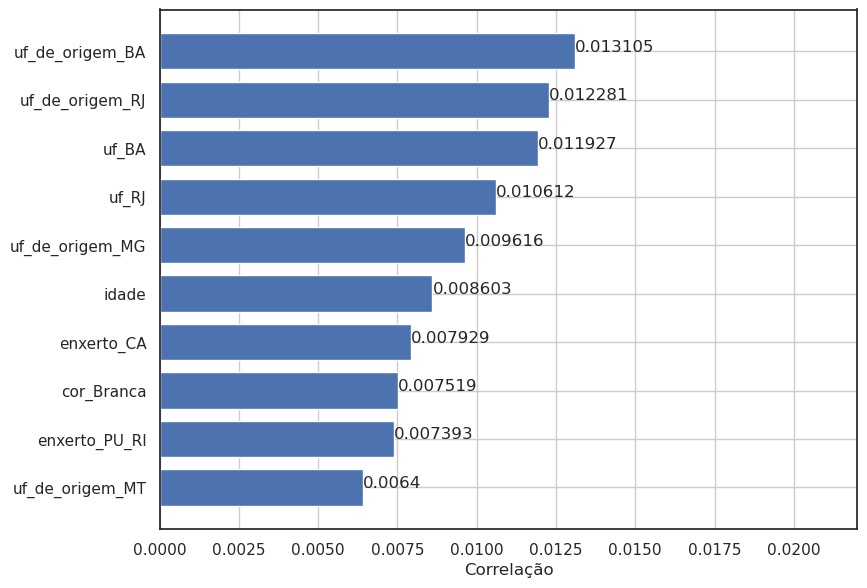

In [17]:
import matplotlib.pyplot as plt
import numpy as np

k = 0.75

fig = plt.figure(figsize=[k * 12, k * 9])

# Example data
people = (
    "uf_de_origem_BA",
    "uf_de_origem_RJ",
    "uf_BA",
    "uf_RJ",
    "uf_de_origem_MG",
    "idade",
    "enxerto_CA",
    "cor_Branca",
    "enxerto_PU_RI",
    "uf_de_origem_MT",
)
y_pos = np.arange(len(people))
performance = [
    0.013105,
    0.012281,
    0.011927,
    0.010612,
    0.009616,
    0.008603,
    0.007929,
    0.007519,
    0.007393,
    0.006400,
]

ax = fig.add_subplot(1, 1, 1)

width = 0.75

ax.barh(
    y_pos,
    performance,
    width,
    align="center",
)

for i, v in enumerate(performance):
    ax.text(v, i, str(v), fontsize=12)

ax.set_yticks(y_pos, labels=people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel("Correlação")
ax.set_xlim(0, 0.022)
ax.grid()

plt.show()

Total explained variance ratio: 0.9999998688510087


Text(0.5, 1.0, 'PCA')

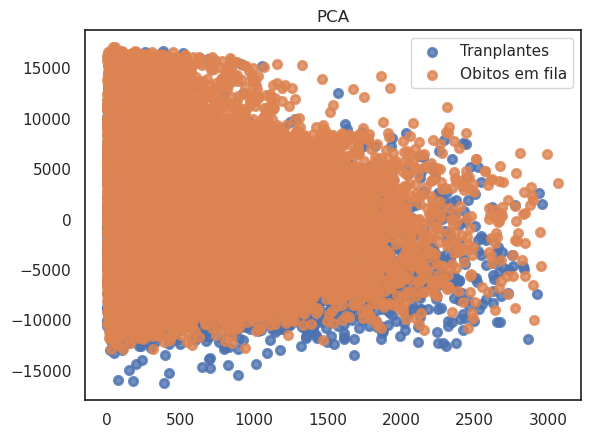

In [18]:
from sklearn.decomposition import PCA

X = df_treated.drop(columns=['delta_t', 'obito_bin', 'transplante_bin'])
y = df_treated.delta_t

pca = PCA(n_components=1)
X_r = pca.fit(X).transform(X)

print(
    "Total explained variance ratio: %s"
    % str(sum(pca.explained_variance_ratio_))
)

target_names = ["Óbito em fila", "Transplante"]
lw = 2

plt.scatter(
    y[df_treated['transplante_bin'] == 0],
    X_r[df_treated['transplante_bin'] == 0],
    alpha=0.8,
    lw=lw,
    label="Tranplantes",
)

plt.scatter(
    y[df_treated['transplante_bin'] == 1],
    X_r[df_treated['transplante_bin'] == 1],
    alpha=0.8,
    lw=lw,
    label="Obitos em fila",
)

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA")

In [15]:
import numpy as np
from sklearn.impute import KNNImputer


imputer = KNNImputer(n_neighbors=2, weights="uniform")
df_bin_input = imputer.fit_transform(df_bin)

In [17]:
df_bin_input = pd.DataFrame(df_bin_input,columns=df_bin.columns)

In [23]:
len(df_bin_input)

183011

<Axes: >

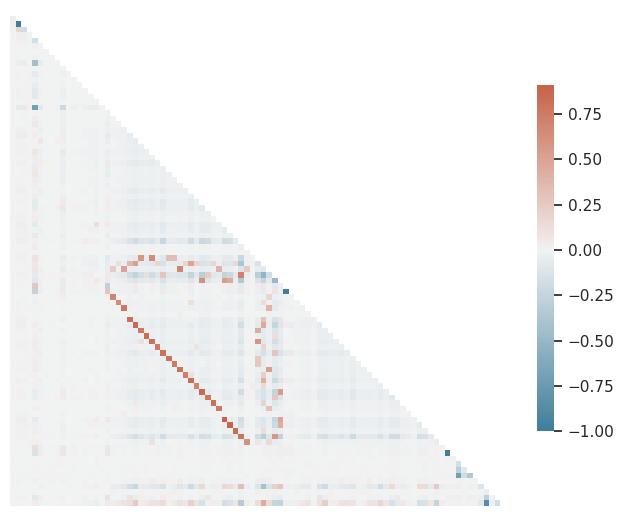

In [18]:
sns.set_theme(style="white")


# Compute the correlation matrix
corr = df_bin_input.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr.fillna(0),
    mask=mask,
    cmap=cmap,
    center=0,
    square=True,
    # linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    xticklabels=False, yticklabels=False
    
)

In [19]:
corr_abs = ((corr.fillna(0)) ** 2) ** 0.5
pd.DataFrame(
    {
        "Atributo": corr_abs.obito_bin.sort_values(ascending=False).index,
        "Correlação": corr_abs.obito_bin.sort_values(ascending=False).values,
    }
).head(12)


,Atributo,Correlação
0,transplante_bin,1.000000
1,obito_bin,1.000000
2,delta_t,0.175746
3,enxerto_RI,0.062318
4,uf_CE,0.040307
5,enxerto_FI,0.037534
6,idade,0.032010
7,uf_de_origem_RS,0.030033
8,uf_RS,0.029011
9,enxerto_CA,0.028676


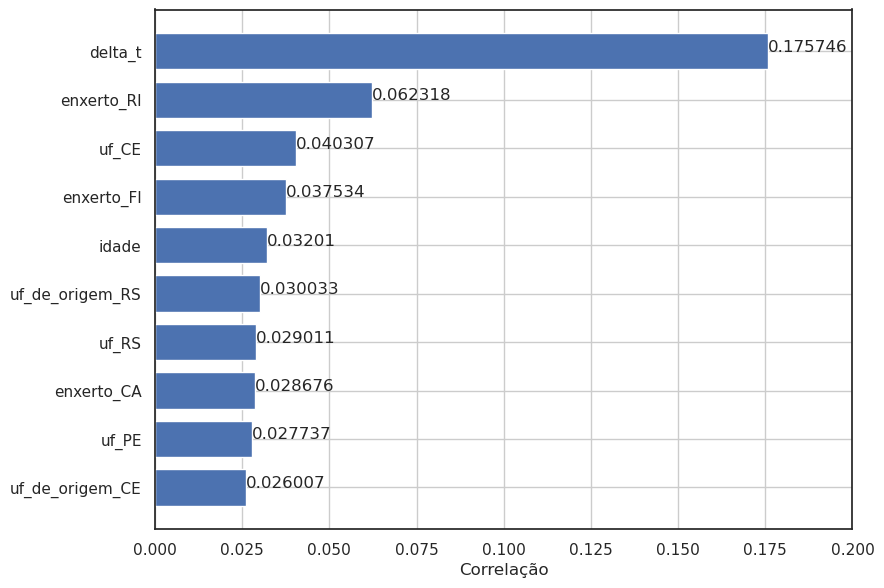

In [40]:
import matplotlib.pyplot as plt
import numpy as np

k = 0.75

fig = plt.figure(figsize=[k * 12, k * 9])


# Example data
people = (
    "delta_t",
    "enxerto_RI",
    "uf_CE",
    "enxerto_FI",
    "idade",
    "uf_de_origem_RS",
    "uf_RS",
    "enxerto_CA",
    "uf_PE",
    "uf_de_origem_CE",
)
y_pos = np.arange(len(people))
performance = [
    0.175746,
    0.062318,
    0.040307,
    0.037534,
    0.032010,
    0.030033,
    0.029011,
    0.028676,
    0.027737,
    0.026007,
]

ax = fig.add_subplot(1, 1, 1)

width = 0.75

ax.barh(
    y_pos,
    performance,
    width,
    align="center",
)

for i, v in enumerate(performance):
    ax.text(v, i, str(v), fontsize=12)

ax.set_yticks(y_pos, labels=people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel("Correlação")
ax.set_xlim(0, 0.2)
ax.grid()

plt.show()

In [20]:

pd.DataFrame(
    {
        "Atributo": corr_abs.transplante_bin.sort_values(ascending=False).index,
        "Correlação": corr_abs.transplante_bin.sort_values(ascending=False).values,
    }
).head(12)


,Atributo,Correlação
0,transplante_bin,1.000000
1,obito_bin,1.000000
2,delta_t,0.175746
3,enxerto_RI,0.062318
4,uf_CE,0.040307
5,enxerto_FI,0.037534
6,idade,0.032010
7,uf_de_origem_RS,0.030033
8,uf_RS,0.029011
9,enxerto_CA,0.028676


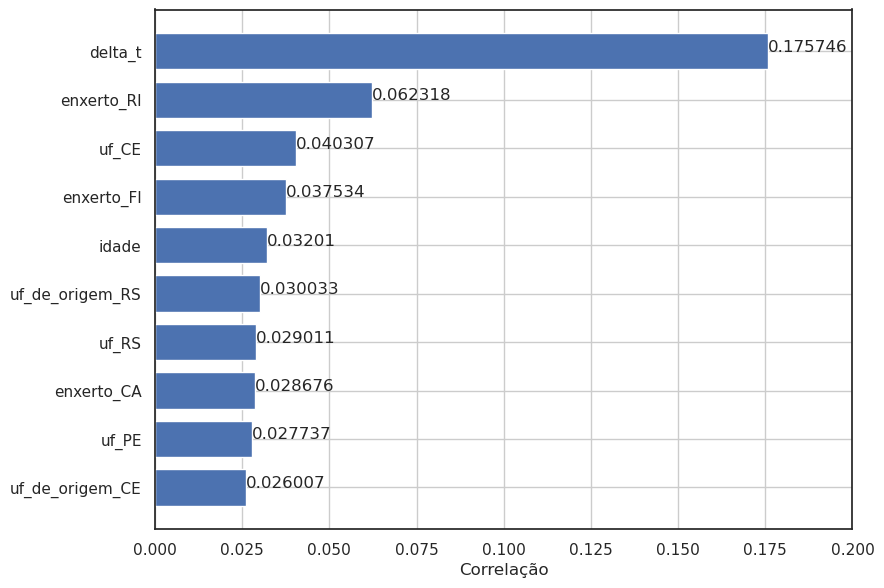

In [41]:
import matplotlib.pyplot as plt
import numpy as np

k = 0.75

fig = plt.figure(figsize=[k * 12, k * 9])

# Example data
people = (
"delta_t",
"enxerto_RI",
"uf_CE",
"enxerto_FI",
"idade",
"uf_de_origem_RS",
"uf_RS",
"enxerto_CA",
"uf_PE",
"uf_de_origem_CE",
)
y_pos = np.arange(len(people))
performance = [
0.175746,
0.062318,
0.040307,
0.037534,
0.032010,
0.030033,
0.029011,
0.028676,
0.027737,
0.026007,
]

ax = fig.add_subplot(1, 1, 1)

width = 0.75

ax.barh(
    y_pos,
    performance,
    width,
    align="center",
)

for i, v in enumerate(performance):
    ax.text(v, i, str(v), fontsize=12)

ax.set_yticks(y_pos, labels=people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel("Correlação")
ax.set_xlim(0, 0.2)
ax.grid()

plt.show()

In [21]:

pd.DataFrame(
    {
        "Atributo": corr_abs.delta_t.sort_values(ascending=False).index,
        "Correlação": corr_abs.delta_t.sort_values(ascending=False).values,
    }
).head(13)

,Atributo,Correlação
0,delta_t,1.000000
1,obito_bin,0.175746
2,transplante_bin,0.175746
3,uf_de_origem_SC,0.009138
4,idade,0.007738
5,uf_SC,0.007393
6,uf_BA,0.005858
7,uf_AM,0.005162
8,uf_de_origem_AM,0.005149
9,uf_SP,0.005028


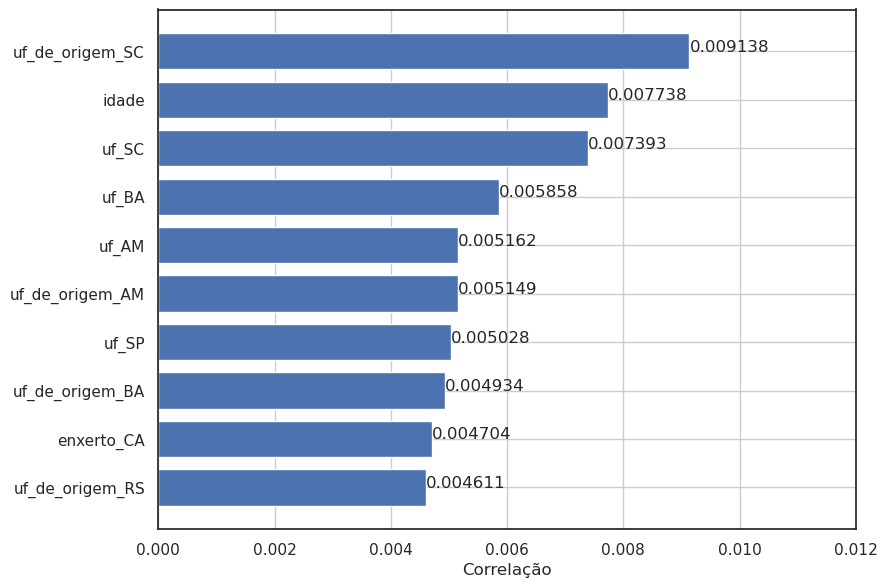

In [45]:
import matplotlib.pyplot as plt
import numpy as np

k = 0.75

fig = plt.figure(figsize=[k * 12, k * 9])


# Example data
people = (
    "uf_de_origem_SC",
    "idade",
    "uf_SC",
    "uf_BA",
    "uf_AM",
    "uf_de_origem_AM",
    "uf_SP",
    "uf_de_origem_BA",
    "enxerto_CA",
    "uf_de_origem_RS",
)
y_pos = np.arange(len(people))
performance = [
    0.009138,
    0.007738,
    0.007393,
    0.005858,
    0.005162,
    0.005149,
    0.005028,
    0.004934,
    0.004704,
    0.004611,
]

ax = fig.add_subplot(1, 1, 1)

width = 0.75

ax.barh(
    y_pos,
    performance,
    width,
    align="center",
)

for i, v in enumerate(performance):
    ax.text(v, i, str(v), fontsize=12)

ax.set_yticks(y_pos, labels=people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel("Correlação")
ax.set_xlim(0, 0.012)
ax.grid()

plt.show()

Total explained variance ratio: 0.9999999167824363


Text(0.5, 1.0, 'PCA')

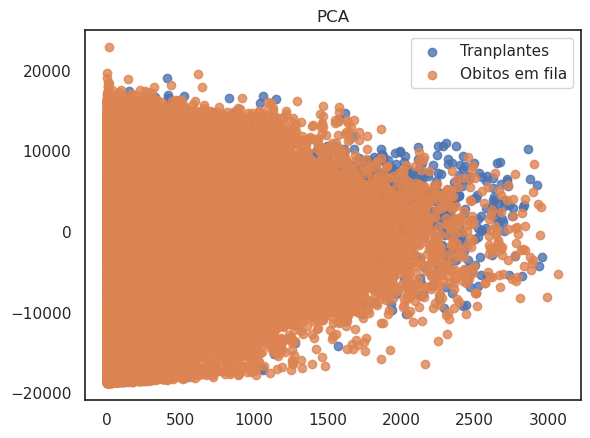

In [41]:
from sklearn.decomposition import PCA

X = df_bin_input.drop(columns=['delta_t', 'obito_bin', 'transplante_bin'])
y = df_bin_input.delta_t

pca = PCA(n_components=1)
X_r = pca.fit(X).transform(X)

print(
    "Total explained variance ratio: %s"
    % str(sum(pca.explained_variance_ratio_))
)

target_names = ["Óbito em fila", "Transplante"]
lw = 1

plt.scatter(
    y[df_bin_input['transplante_bin'] == 0],
    X_r[df_bin_input['transplante_bin'] == 0],
    alpha=0.8,
    lw=lw,
    label="Tranplantes",
)

plt.scatter(
    y[df_bin_input['transplante_bin'] == 1],
    X_r[df_bin_input['transplante_bin'] == 1],
    alpha=0.8,
    lw=lw,
    label="Obitos em fila",
)

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA")

In [24]:
df_bin_input.to_csv("df_bin_input.csv")

In [45]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
X_redu,_,y_redu,_ = train_test_split(X_r,y,train_size=0.2)

X_train, X_test, y_train, y_test = train_test_split(X_redu, y_redu,test_size=0.2)

regr = MLPRegressor(random_state=1, hidden_layer_sizes=(300,300,300,300),max_iter=50,early_stopping=True).fit(X_train, y_train)
regr.score(X_test, y_test)

/home/thiago/anaconda3/envs/snt_tables/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


0.00492658376149302

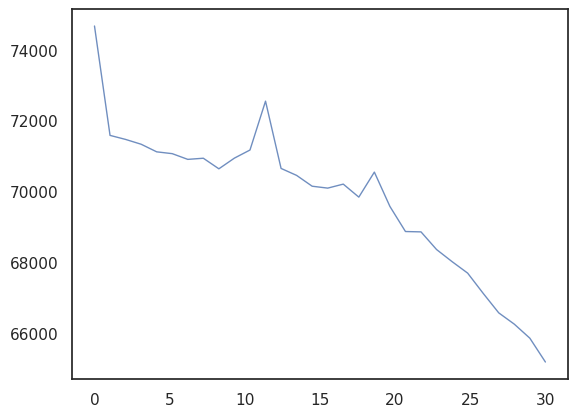

In [43]:
plt.plot(
    np.linspace(0,len(regr.loss_curve_),num=len(regr.loss_curve_)),
    regr.loss_curve_,
    alpha=0.8,
    lw=lw,
    label="Treino",
)


Text(0.5, 1.0, 'PCA')

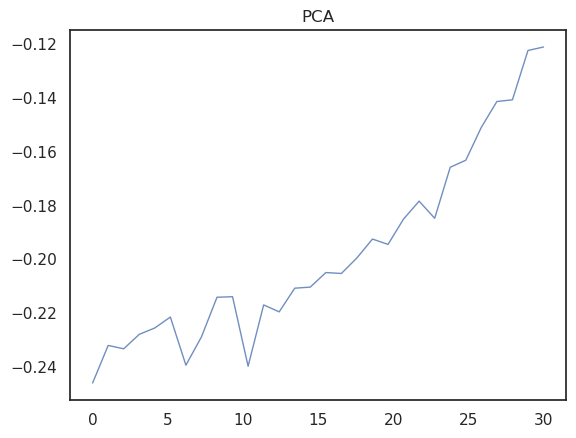

In [44]:
plt.plot(
    np.linspace(0,len(regr.validation_scores_),num=len(regr.validation_scores_)),
    regr.validation_scores_,
    alpha=0.8,
    lw=lw,
    label="Validação",
)


plt.title("PCA")